In [1]:
import tensorflow as tf
import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

In [3]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


9


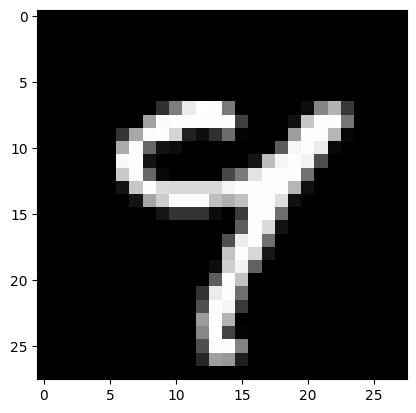

In [4]:
plt.imshow(train_X[54], cmap = 'gray')
print(train_Y[54])

In [5]:
np.unique(train_Y), len(np.unique(train_Y))
for i in train_Y:
    print(i)
    temp = np.zeros(len(np.unique(train_Y)))
    temp[i] = 1
    print(temp)
    break

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [8]:
print(train_Y[54])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
train_X = train_X/255
test_X = test_X/255

In [10]:
print(train_X[6453].shape)

(28, 28)


In [11]:
train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

In [12]:
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [13]:
a = np.array([[[1,2,3]]])
print(a.shape)

(1, 1, 3)


In [14]:
img_shape = (28, 28, 1)

In [15]:
model = keras.Sequential([
    keras.Input(shape = img_shape),
    keras.layers.Conv2D(40, kernel_size = (5, 5), strides = (1,1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1,1), padding = 'same'),
    keras.layers.Conv2D(60, kernel_size = (5, 5), strides = (1,1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1,1), padding = 'same'),
    keras.layers.Conv2D(80, kernel_size = (5, 5), strides = (1,1), padding = 'valid', activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (5, 5), strides = (1,1), padding = 'same'),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax') 
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 40)        1040      
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 40)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 60)        60060     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 60)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 80)        120080    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 80)        0

In [17]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [18]:
hist = model.fit(train_X, train_Y, batch_size = 500, epochs = 10, validation_split = 0.1)

Epoch 1/10
108/108 [==============================] - 286s 3s/step - loss: 0.3758 - accuracy: 0.8790 - precision: 0.9591 - recall: 0.8346 - val_loss: 0.0585 - val_accuracy: 0.9818 - val_precision: 0.9843 - val_recall: 0.9798
Epoch 2/10
108/108 [==============================] - 200s 2s/step - loss: 0.0631 - accuracy: 0.9795 - precision: 0.9822 - recall: 0.9776 - val_loss: 0.0542 - val_accuracy: 0.9828 - val_precision: 0.9854 - val_recall: 0.9818
Epoch 3/10
108/108 [==============================] - 197s 2s/step - loss: 0.0439 - accuracy: 0.9859 - precision: 0.9873 - recall: 0.9847 - val_loss: 0.0409 - val_accuracy: 0.9868 - val_precision: 0.9886 - val_recall: 0.9857
Epoch 4/10
108/108 [==============================] - 197s 2s/step - loss: 0.0345 - accuracy: 0.9889 - precision: 0.9901 - recall: 0.9880 - val_loss: 0.0296 - val_accuracy: 0.9918 - val_precision: 0.9927 - val_recall: 0.9905
Epoch 5/10
108/108 [==============================] - 239s 2s/step - loss: 0.0297 - accuracy: 0.9905

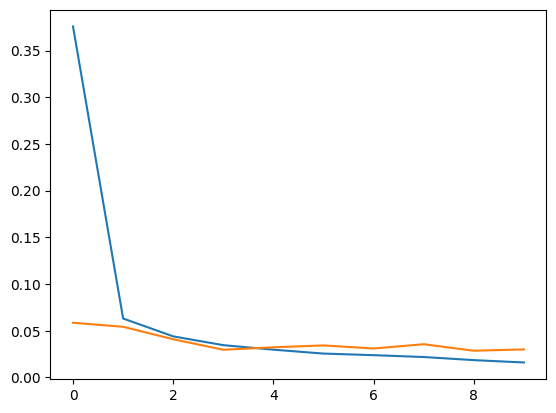

In [19]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

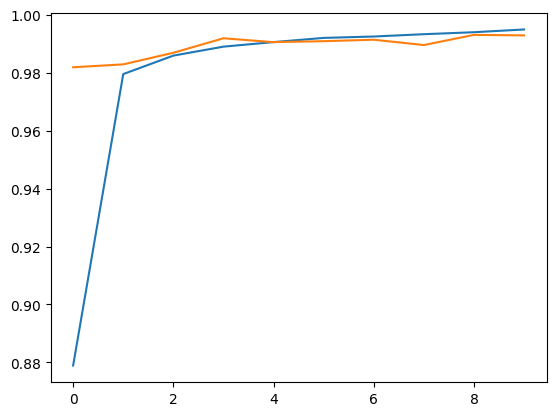

In [20]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

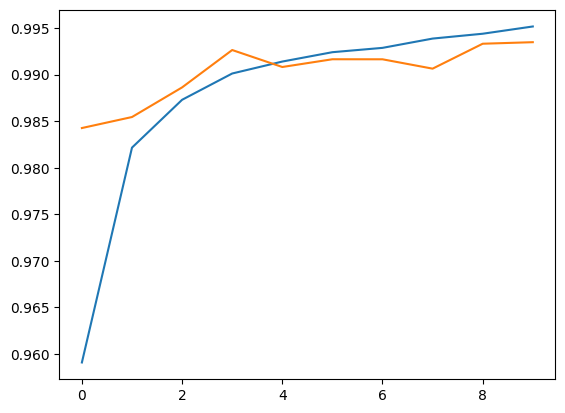

In [21]:
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])

In [22]:
print(np.argmax(model.predict(test_X[300].reshape(1, 28, 28, 1))))
print(test_Y[300])

1/1 [==============================] - 0s 148ms/step
4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


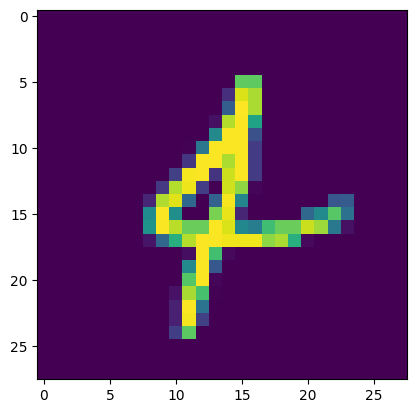

In [23]:
plt.imshow(test_X[300])